# Understanding Data Clustering with K-Means and PCA

Data analysis is an essential part of decision-making processes in various industries. Clustering, a form of unsupervised machine learning, plays a vital role in segmenting data into meaningful groups. In this article, we will explore the use of K-Means clustering and Principal Component Analysis (PCA) to gain insights from a dataset containing FIFA player statistics.

## Getting Started

Before we dive into clustering, we need to prepare our environment by importing the necessary Python libraries and loading the dataset. For this tutorial, we'll be using the FIFA player dataset. Here's how we set things up:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fifa_data = pd.read_csv('./FIFA.csv')

## Data Preprocessing

### Handling Missing Values
Data preprocessing is crucial to ensure the accuracy of our analysis. We start by checking for missing values in our dataset:

In [6]:
cluster_data["Club"] = cluster_data["Club"].fillna("No Club")
cluster_data.isna().sum()

C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Age            0
Nationality    0
Overall        0
Club           0
Value          0
Wage           0
dtype: int64

We also need to fix the Value and Wage columns by converting them to numerical values:

### Fix `Value` and `Wage` Columns

In [7]:
# Function to convert the `Value` and `Wage` to be numerical
def convert_value(value):
    # Remove Euro symbol and leading/trailing whitespace
    value = value.replace('€', '').strip()
    
    # Check if the value ends with 'M'
    if value.endswith('M'):
        # Convert 'M' to six zeros
        value = float(value.replace('M', '')) * 1e6
    elif value.endswith('K'):
        # Convert 'K' to three zeros
        value = float(value.replace('K', '')) * 1e3
    
    return value

# Apply the conversion function to the 'Value' column
cluster_data['Value'] = cluster_data['Value'].apply(convert_value)

cluster_data["Wage"] = cluster_data["Wage"].apply(convert_value)
cluster_data

C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Nationality,Overall,Club,Value,Wage
0,31,Argentina,94,FC Barcelona,110500000.0,565000.0
1,33,Portugal,94,Juventus,77000000.0,405000.0
2,26,Brazil,92,Paris Saint-Germain,118500000.0,290000.0
3,27,Spain,91,Manchester United,72000000.0,260000.0
4,27,Belgium,91,Manchester City,102000000.0,355000.0
...,...,...,...,...,...,...
18202,19,England,47,Crewe Alexandra,60000.0,1000.0
18203,19,Sweden,47,Trelleborgs FF,60000.0,1000.0
18204,16,England,47,Cambridge United,60000.0,1000.0
18205,17,England,47,Tranmere Rovers,60000.0,1000.0


We turn the wage and value columns to integers.

In [8]:
cluster_data["Value"] = cluster_data["Value"].astype('int')
cluster_data["Wage"] = cluster_data["Wage"].astype('int')

C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          18207 non-null  int64 
 1   Nationality  18207 non-null  object
 2   Overall      18207 non-null  int64 
 3   Club         18207 non-null  object
 4   Value        18207 non-null  int32 
 5   Wage         18207 non-null  int32 
dtypes: int32(2), int64(2), object(2)
memory usage: 711.3+ KB


### Encoding Categorical Data
Next, we encode categorical data using one-hot encoding:

In [10]:
# Encode the data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,3])], remainder='passthrough')
X = ct.fit_transform(cluster_data)
print(X)

  (0, 6)	1.0
  (0, 376)	1.0
  (0, 816)	31.0
  (0, 817)	94.0
  (0, 818)	110500000.0
  (0, 819)	565000.0
  (1, 123)	1.0
  (1, 490)	1.0
  (1, 816)	33.0
  (1, 817)	94.0
  (1, 818)	77000000.0
  (1, 819)	405000.0
  (2, 20)	1.0
  (2, 600)	1.0
  (2, 816)	26.0
  (2, 817)	92.0
  (2, 818)	118500000.0
  (2, 819)	290000.0
  (3, 139)	1.0
  (3, 539)	1.0
  (3, 816)	27.0
  (3, 817)	91.0
  (3, 818)	72000000.0
  (3, 819)	260000.0
  (4, 13)	1.0
  :	:
  (18202, 819)	1000.0
  (18203, 144)	1.0
  (18203, 752)	1.0
  (18203, 816)	19.0
  (18203, 817)	47.0
  (18203, 818)	60000.0
  (18203, 819)	1000.0
  (18204, 46)	1.0
  (18204, 286)	1.0
  (18204, 816)	16.0
  (18204, 817)	47.0
  (18204, 818)	60000.0
  (18204, 819)	1000.0
  (18205, 46)	1.0
  (18205, 751)	1.0
  (18205, 816)	17.0
  (18205, 817)	47.0
  (18205, 818)	60000.0
  (18205, 819)	1000.0
  (18206, 46)	1.0
  (18206, 751)	1.0
  (18206, 816)	16.0
  (18206, 817)	46.0
  (18206, 818)	60000.0
  (18206, 819)	1000.0


## Determining the Optimal Number of Clusters
Before applying K-Means clustering, we need to determine the optimal number of clusters. We can do this using the Elbow Method:

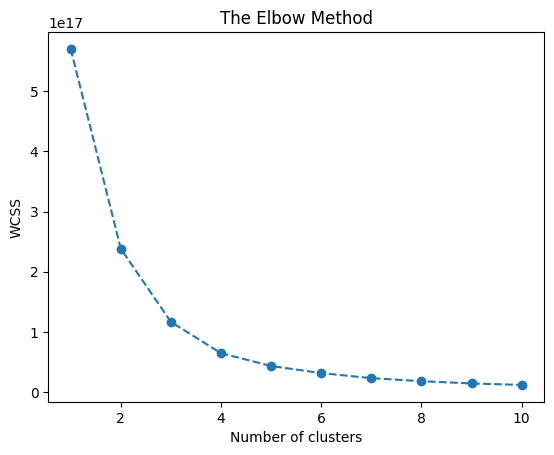

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering
With the optimal number of clusters identified (in this case, let's say 4), we can now perform K-Means clustering:

In [12]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Analyzing the Clusters
Let's take a closer look at our clusters and analyze the results:

In [13]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [14]:
df_cluster = cluster_data.copy()

df_cluster["K-means"] = kmeans.labels_

In [15]:
df_cluster_analysis = df_cluster.groupby(["K-means"]).mean()
df_cluster_analysis

,Age,Overall,Value,Wage
K-means,,,,
0,26.057471,75.959291,8.282807e+06,28850.574713
1,24.973728,64.516539,9.071590e+05,4809.478372
2,26.873016,87.984127,6.223016e+07,222793.650794
3,25.928571,82.327381,2.504762e+07,81241.071429


We also calculate the size and proportions of the clusters:

In [16]:
# Compute the size and proportions of the four clusters
df_cluster_analysis['N Obs'] = df_cluster[['K-means','Nationality']].groupby(['K-means']).count()
df_cluster_analysis['Prop Obs'] = df_cluster_analysis['N Obs'] / df_cluster_analysis['N Obs'].sum()

In [17]:
df_cluster_analysis

,Age,Overall,Value,Wage,N Obs,Prop Obs
K-means,,,,,,
0,26.057471,75.959291,8.282807e+06,28850.574713,2088,0.114681
1,24.973728,64.516539,9.071590e+05,4809.478372,15720,0.863404
2,26.873016,87.984127,6.223016e+07,222793.650794,63,0.003460
3,25.928571,82.327381,2.504762e+07,81241.071429,336,0.018454


In [18]:
df_cluster_analysis.rename({0:'Average Performers',
                            1:'Worst Performers',
                            2:'Best Performers',
                            3:'Performers'})

,Age,Overall,Value,Wage,N Obs,Prop Obs
K-means,,,,,,
Average Performers,26.057471,75.959291,8.282807e+06,28850.574713,2088,0.114681
Worst Performers,24.973728,64.516539,9.071590e+05,4809.478372,15720,0.863404
Best Performers,26.873016,87.984127,6.223016e+07,222793.650794,63,0.003460
Performers,25.928571,82.327381,2.504762e+07,81241.071429,336,0.018454


In [19]:
# Add the segment labels to our table
df_cluster['Labels'] = df_cluster['K-means'].map({0:'Average Performers',
                                                  1:'Worst Performers',
                                                  2:'Best Performers',
                                                  3:'Performers'})

In [20]:
df_cluster

,Age,Nationality,Overall,Club,Value,Wage,K-means,Labels
0,31,Argentina,94,FC Barcelona,110500000,565000,2,Best Performers
1,33,Portugal,94,Juventus,77000000,405000,2,Best Performers
2,26,Brazil,92,Paris Saint-Germain,118500000,290000,2,Best Performers
3,27,Spain,91,Manchester United,72000000,260000,2,Best Performers
4,27,Belgium,91,Manchester City,102000000,355000,2,Best Performers
...,...,...,...,...,...,...,...,...
18202,19,England,47,Crewe Alexandra,60000,1000,1,Worst Performers
18203,19,Sweden,47,Trelleborgs FF,60000,1000,1,Worst Performers
18204,16,England,47,Cambridge United,60000,1000,1,Worst Performers
18205,17,England,47,Tranmere Rovers,60000,1000,1,Worst Performers


## Visualizing the Clusters
To visualize the clusters, we create scatterplots:

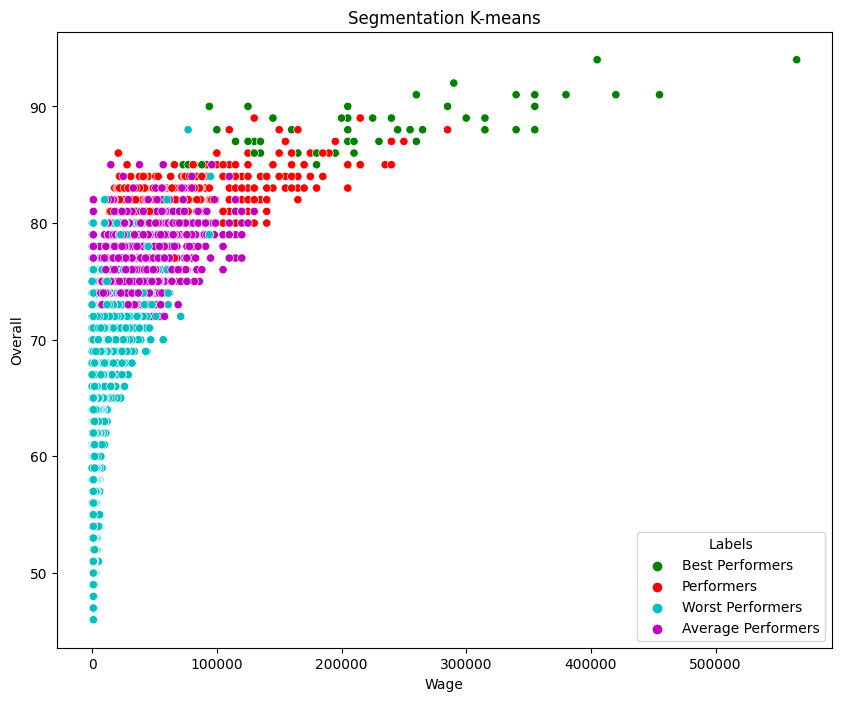

In [21]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_cluster['Wage']
y_axis = df_cluster['Overall']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=df_cluster,x=x_axis, y=y_axis, 
                hue = df_cluster['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [22]:
# Clubs with the best performing Players
df_cluster[df_cluster["Labels"]=="Best Performers"].groupby("Club", as_index=False)["Overall"].count()

,Club,Overall
0,Arsenal,2
1,Atlético Madrid,5
2,Chelsea,2
3,FC Barcelona,7
4,FC Bayern München,5
5,Inter,2
6,Juventus,4
7,Lazio,2
8,Liverpool,4
9,Manchester City,6


In [23]:
# Nationalities with the best performing Players
df_cluster[df_cluster["Labels"]=="Best Performers"].groupby("Nationality", as_index=False)["Overall"].count()

,Nationality,Overall
0,Argentina,5
1,Belgium,5
2,Bosnia Herzegovina,1
3,Brazil,5
4,Colombia,1
5,Croatia,2
6,Denmark,1
7,Egypt,1
8,England,2
9,France,8


## PCA

In [24]:
from sklearn.decomposition import PCA

# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [25]:
# Select the data for use and Standardize the data
pca_data = fifa_data.select_dtypes(include=["int", "float"])
pca_data = pca_data.iloc[:,2:]
pca_data_all = pca_data.copy()
pca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Potential                 18207 non-null  int64  
 3   Special                   18207 non-null  int64  
 4   International Reputation  18159 non-null  float64
 5   Weak Foot                 18159 non-null  float64
 6   Skill Moves               18159 non-null  float64
 7   Jersey Number             18147 non-null  float64
 8   Crossing                  18159 non-null  float64
 9   Finishing                 18159 non-null  float64
 10  HeadingAccuracy           18159 non-null  float64
 11  ShortPassing              18159 non-null  float64
 12  Volleys                   18159 non-null  float64
 13  Dribbling                 18159 non-null  float64
 14  Curve 

In [26]:
# Fix missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(pca_data)
pca_data = imputer.transform(pca_data)

In [27]:
sc = StandardScaler()
pca_data_std = sc.fit_transform(pca_data)
pca_data_std

array([[ 1.25867833,  4.01828714,  3.69809177, ..., -0.07391134,
        -0.13957297, -0.48489768],
       [ 1.68696087,  4.01828714,  3.69809177, ..., -0.07391134,
        -0.13957297, -0.31761143],
       [ 0.18797198,  3.72879875,  3.53512784, ..., -0.07391134,
        -0.08079776, -0.31761143],
       ...,
       [-1.95344072, -2.78469008, -0.70193445, ..., -0.37725737,
        -0.60977466, -0.20608726],
       [-1.73929945, -2.78469008, -0.86489839, ..., -0.13458054,
        -0.49222424, -0.4291356 ],
       [-1.95344072, -2.92943428, -0.86489839, ..., -0.43792658,
        -0.25712339, -0.4291356 ]])

In [28]:
# Fit PCA with our standardized data.
pca.fit(pca_data_std)

PCA()

In [29]:
# The attribute shows how much variance is explained by each of the four individual components.
pca.explained_variance_ratio_

array([4.97893735e-01, 1.20522384e-01, 9.46282620e-02, 4.31422784e-02,
       3.27713854e-02, 3.07283132e-02, 2.08695480e-02, 1.99185744e-02,
       1.74104984e-02, 1.40835060e-02, 1.06389704e-02, 8.61595863e-03,
       7.64499315e-03, 6.54800266e-03, 6.29149631e-03, 5.77424091e-03,
       5.42289076e-03, 5.08356777e-03, 4.92252161e-03, 4.63667148e-03,
       4.47230599e-03, 4.13637476e-03, 3.70159829e-03, 3.29256064e-03,
       2.95448496e-03, 2.92550280e-03, 2.64669981e-03, 2.48111575e-03,
       2.08116208e-03, 1.92259650e-03, 1.71205543e-03, 1.61107135e-03,
       1.53909831e-03, 1.44570868e-03, 1.12214070e-03, 8.90810720e-04,
       8.68520228e-04, 7.30638408e-04, 7.22031163e-04, 6.33660321e-04,
       5.42806030e-04, 1.92589381e-05])

Text(0, 0.5, 'Cumulative Explained Variance')

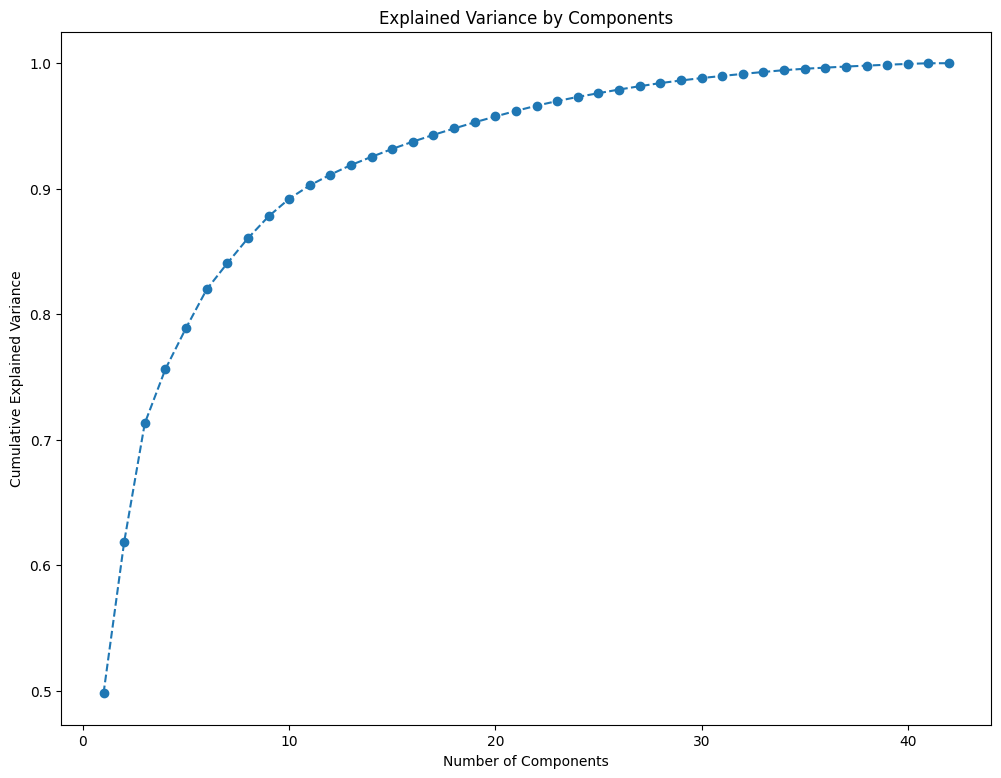

In [30]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,43), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [31]:
# We choose ten components. 9 or 10 seems the right choice according to the previous graph.
pca = PCA(n_components = 10)

In [32]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(pca_data_std)

PCA(n_components=10)

## PCA Results

In [33]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
np.round(pca.components_, 3)

array([[-0.027, -0.103, -0.072, -0.211, -0.051, -0.08 , -0.179,  0.02 ,
        -0.191, -0.172, -0.154, -0.201, -0.178, -0.204, -0.188, -0.176,
        -0.179, -0.21 , -0.155, -0.153, -0.159, -0.102, -0.137, -0.188,
        -0.059, -0.175, -0.029, -0.188, -0.139, -0.11 , -0.191, -0.159,
        -0.173, -0.154, -0.116, -0.109, -0.102,  0.18 ,  0.18 ,  0.179,
         0.179,  0.18 ],
       [ 0.084,  0.041, -0.021,  0.024,  0.003, -0.083, -0.12 , -0.075,
        -0.034, -0.211,  0.177,  0.04 , -0.166, -0.1  , -0.109, -0.086,
         0.076, -0.032, -0.13 , -0.108, -0.158,  0.041, -0.14 , -0.073,
         0.123,  0.105,  0.241, -0.133,  0.265,  0.348, -0.143, -0.135,
        -0.138,  0.029,  0.332,  0.354,  0.356, -0.073, -0.073, -0.073,
        -0.071, -0.073],
       [ 0.283,  0.402,  0.222,  0.099,  0.27 ,  0.051,  0.015, -0.121,
         0.001,  0.015, -0.035,  0.041,  0.05 , -0.035,  0.049,  0.066,
         0.077, -0.   , -0.123, -0.12 , -0.05 ,  0.37 , -0.113,  0.052,
         0.06 

In [34]:
df_pca_comp = pd.DataFrame(data = np.round(pca.components_, 5),
                           columns = pca_data_all.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3',
                                    'Component 4', 'Component 5', 'Component 6',
                                    'Component 7', 'Component 8', 'Component 9',
                                    'Component 10'])
df_pca_comp

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Component 1,-0.02720,-0.10256,-0.07215,-0.21072,-0.05145,-0.08010,-0.17947,0.02011,-0.19094,-0.17177,...,-0.17266,-0.15380,-0.11615,-0.10940,-0.10225,0.18018,0.17988,0.17917,0.17910,0.17999
Component 2,0.08357,0.04108,-0.02064,0.02415,0.00343,-0.08298,-0.12037,-0.07504,-0.03442,-0.21067,...,-0.13784,0.02887,0.33244,0.35426,0.35627,-0.07264,-0.07300,-0.07350,-0.07109,-0.07256
Component 3,0.28270,0.40170,0.22217,0.09904,0.27027,0.05064,0.01514,-0.12077,0.00121,0.01531,...,0.02104,0.25084,-0.02398,-0.03315,-0.04353,0.23538,0.23645,0.23462,0.23966,0.23658
Component 4,0.25284,-0.08394,-0.28144,-0.05831,-0.02801,0.01538,-0.04357,-0.01444,-0.12449,0.18960,...,0.21962,0.02631,-0.12874,-0.15184,-0.17486,-0.11124,-0.10843,-0.10613,-0.10796,-0.10913
Component 5,0.23293,-0.14833,-0.31722,0.02198,-0.07220,0.00592,-0.00157,-0.03751,0.15958,-0.05216,...,-0.00459,-0.01708,0.08794,0.12247,0.12118,0.02840,0.03193,0.03531,0.02969,0.02792
Component 6,-0.46107,0.05221,0.48806,-0.05284,0.17305,0.01129,0.06822,0.38718,-0.05734,0.02434,...,0.03355,0.01101,0.02552,0.03837,0.02926,-0.05135,-0.05330,-0.05408,-0.05843,-0.05227
Component 7,0.21600,-0.02938,-0.18055,0.04820,0.09656,-0.21504,-0.05315,0.85867,0.02603,-0.01442,...,0.01724,0.01750,0.00909,0.01742,0.02667,0.04118,0.03922,0.03789,0.03947,0.04038
Component 8,-0.03314,0.04628,0.04925,0.02015,-0.07902,-0.95620,0.02667,-0.15573,0.03582,0.03847,...,0.01973,0.01812,-0.02532,-0.02355,-0.02519,0.00719,0.01033,0.00757,0.00953,0.00936
Component 9,0.07650,-0.08110,-0.06054,-0.07170,0.84083,-0.11349,0.00032,-0.18750,-0.02047,-0.02563,...,0.07851,-0.02334,0.01543,-0.00696,0.00327,-0.09795,-0.09911,-0.10282,-0.09926,-0.10170
Component 10,0.25552,0.09523,-0.16574,-0.02898,0.22114,0.08777,0.06764,0.16324,0.10287,-0.03963,...,-0.09962,0.03265,0.00592,-0.00501,-0.00552,-0.01850,-0.01885,-0.02174,-0.01524,-0.01874


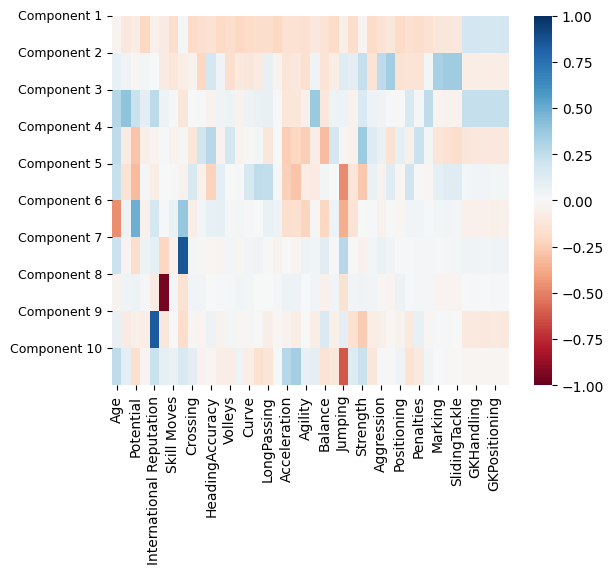

In [35]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = False)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
           ['Component 1', 'Component 2', 'Component 3',
            'Component 4', 'Component 5', 'Component 6',
            'Component 7', 'Component 8', 'Component 9',
            'Component 10'],
#            rotation = 45,
           fontsize = 9)
plt.show()

In [36]:
pca.transform(pca_data_std)

array([[-10.18880231,  -4.93442409,   8.23040794, ...,  -0.70215123,
          6.87604897,   1.60076215],
       [-10.23781879,  -3.43526277,   8.77187294, ...,  -0.79892601,
          6.48071261,   1.43109952],
       [ -9.74182097,  -5.0496503 ,   7.47746363, ...,  -2.08051888,
          6.71829725,   2.37869145],
       ...,
       [  3.59911747,  -2.9297779 ,  -4.47672732, ...,  -0.4713472 ,
          1.2786716 ,  -0.43008435],
       [  3.49509554,  -2.87087077,  -4.98175048, ...,  -0.40109016,
          1.12513874,  -0.07484549],
       [  3.0281007 ,   0.26125409,  -3.5111489 , ...,  -0.70666993,
          0.54033841,  -0.67180464]])

In [37]:
scores_pca = pca.transform(pca_data_std)

## KMeans Clustering with PCA

In [38]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

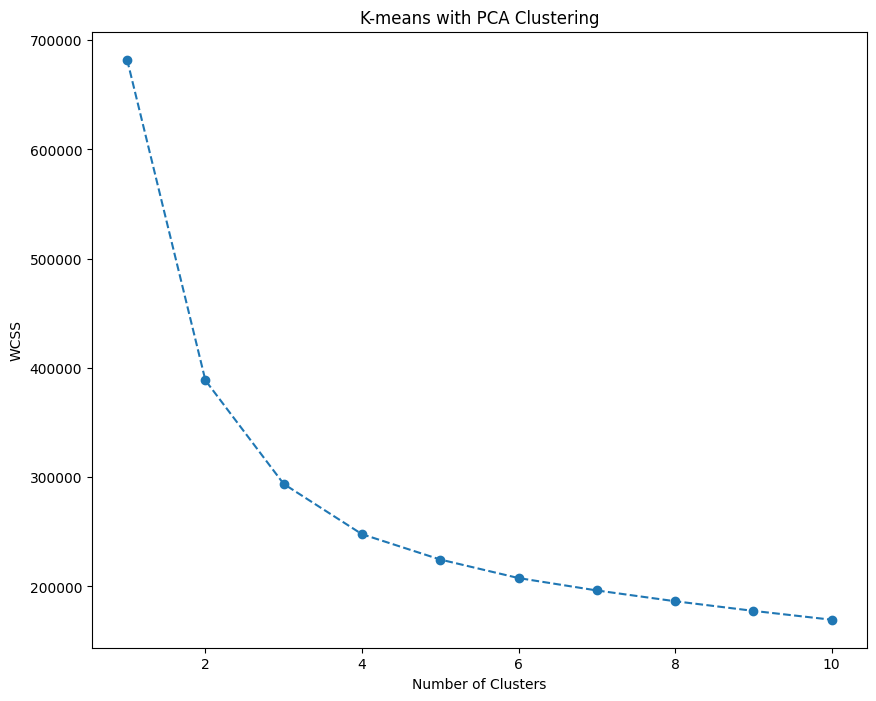

In [39]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [40]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [41]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## KMeans Clustering with PCA results

In [42]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_pca_kmeans = pd.concat([pca_data_all.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-10: ] = ['Component 1', 'Component 2', 'Component 3',
                                       'Component 4', 'Component 5', 'Component 6',
                                       'Component 7', 'Component 8', 'Component 9',
                                       'Component 10']
# The last column we add contains the pca k-means clustering labels.
df_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [43]:
df_pca_kmeans

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Segment K-means PCA
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,-4.934424,8.230408,-1.435587,-1.317932,2.239490,0.229915,-0.702151,6.876049,1.600762,0
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,-3.435263,8.771873,0.382124,-3.993349,1.430279,0.463430,-0.798926,6.480713,1.431100,0
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,-5.049650,7.477464,-2.162656,-1.532512,2.727201,-0.544759,-2.080519,6.718297,2.378691,0
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,-1.402391,10.971208,-3.924055,-2.276305,1.493787,-0.356265,-0.312283,3.885447,1.214150,1
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,-1.510164,7.324699,-1.306482,-0.178675,2.627330,-0.706180,-2.041418,3.840916,1.282955,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1307,1.0,2.0,2.0,22.0,34.0,38.0,...,-0.213781,-3.724551,-0.374969,1.356970,0.438140,0.055971,0.796588,1.367476,-0.877149,3
18203,19,47,63,1098,1.0,2.0,2.0,21.0,23.0,52.0,...,-1.058603,-3.849036,3.356601,0.320174,1.400514,-0.676317,1.003101,1.202197,-0.289718,2
18204,16,47,67,1189,1.0,3.0,2.0,33.0,25.0,40.0,...,-2.929778,-4.476727,0.610368,-0.619479,0.908759,-0.121580,-0.471347,1.278672,-0.430084,2
18205,17,47,66,1228,1.0,3.0,2.0,34.0,44.0,50.0,...,-2.870871,-4.981750,1.009859,1.127637,1.510725,-0.364779,-0.401090,1.125139,-0.074845,2


In [46]:
# We calculate the means by segments.
df_pca_kmeans_freq = df_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_pca_kmeans_freq

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,27.117229,72.176377,74.593961,1874.646714,1.298224,3.192718,2.978863,16.688099,65.229840,59.123979,...,-3.983975,-0.096373,1.289207,-0.191330,0.277474,-0.007341,0.078892,0.008124,-0.091912,-0.099955
1,26.045903,64.599704,69.792695,1046.197927,1.095755,2.490128,1.000000,20.516543,14.257651,12.020237,...,11.023646,-1.076094,2.390843,-0.496690,0.194175,-0.120286,0.095272,0.012216,-0.168322,-0.054010
2,23.030741,62.762946,70.082732,1573.315659,1.004539,3.035898,2.565298,23.803553,50.910047,58.811223,...,-0.681592,-2.177790,-1.264678,0.475369,-0.242780,0.060576,-0.062461,0.053443,0.053460,0.033800
3,24.602209,63.913745,69.641830,1541.305400,1.028465,2.790842,2.059406,18.398514,46.009901,32.687412,...,0.595994,2.327926,-1.047017,-0.038680,-0.136539,-0.001504,-0.058631,-0.057771,0.105078,0.089121


In [47]:
df_pca_kmeans['Legend'] = df_pca_kmeans['Segment K-means PCA'].map({0:'Best Performers',
                                                                    1:'Performers',
                                                                    2:'Below Average',
                                                                    3:'Average'})

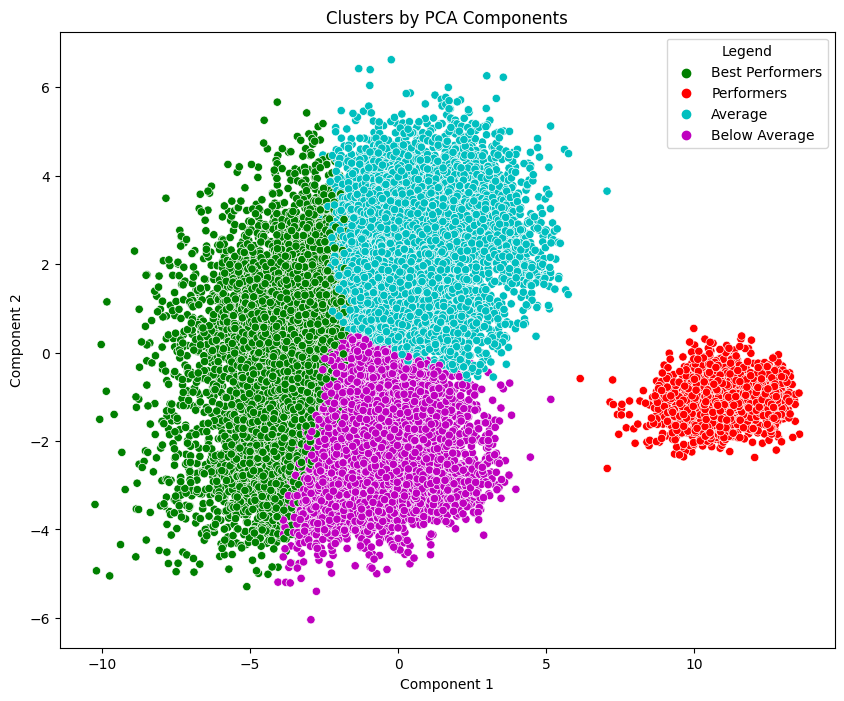

In [60]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_pca_kmeans['Component 1']
y_axis = df_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=df_pca_kmeans, x=x_axis, y=y_axis, 
                hue = df_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

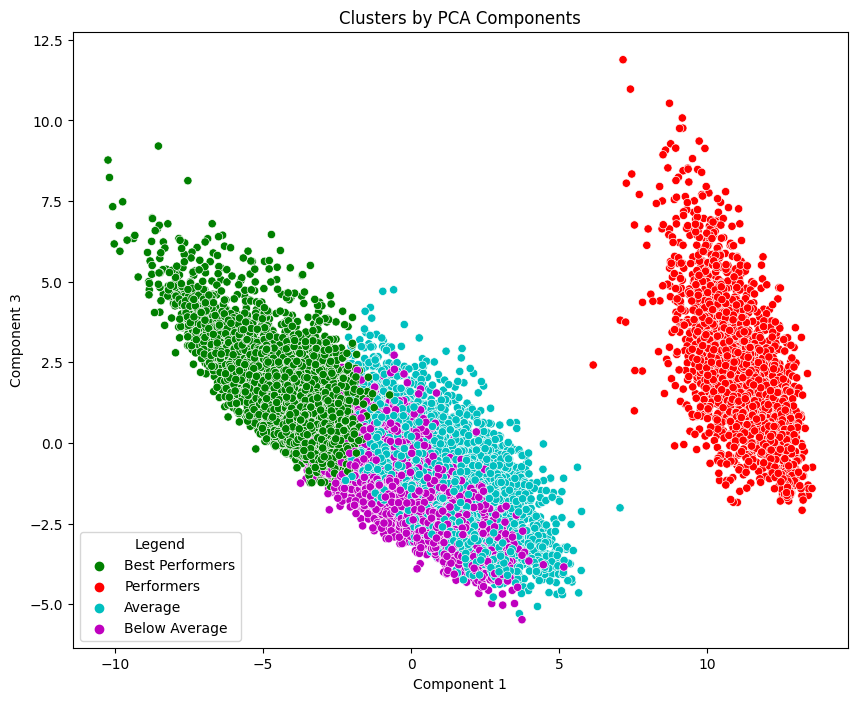

In [61]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_pca_kmeans['Component 1']
y_axis = df_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=df_pca_kmeans, x=x_axis, y=y_axis, 
                hue = df_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

## Data Export

In [64]:
import pickle
pickle.dump(sc, open('scaler.pickle', 'wb'))

In [65]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [66]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))